In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tweepy
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from google.colab                    import drive
from nltk.corpus                     import stopwords

In [5]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [6]:
df2 = pd.DataFrame(columns=['ID', 'text'])

In [7]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='eletrobras', 
                              max_results=100).flatten(limit=2000)

In [8]:
analysis = None

In [9]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  
  df2.loc[count] = [tweet.id]+[tweet.text]
  
  count += 1

In [10]:
df2.head(100)

,ID,text
0,1637262277186297858,RT @CrisVia13: Eletricitários fazem ato no Min...
1,1637262245917782019,RT @CrisVia13: Eletrobras: Associação de empre...
2,1637262233779486722,RT @VictorCostaLuta: A divulgação do balanço d...
3,1637262063033540609,RT @requiaooficial: Não tem importância o diál...
4,1637261988555542528,RT @CrisVia13: Eletrobras: Associação de empre...
...,...,...
95,1637200115327811588,RT @requiaooficial: Não tem importância o diál...
96,1637198866620592128,RT @DiasSalles1: @FlavioBolsonaro Concordo com...
97,1637193282655596547,RT @requiaooficial: Não tem importância o diál...
98,1637192618344865793,@gleisi @LulaOficial E a Eletrobras Gleise?


In [11]:
# Essa expressão regular remove toda a pontuação
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

In [12]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,ID,text,tokens
0,1637262277186297858,RT CrisVia13 Eletricitários fazem ato no Min...,"[RT, CrisVia13, Eletricitários, fazem, ato, no..."
1,1637262245917782019,RT CrisVia13 Eletrobras Associação de empre...,"[RT, CrisVia13, Eletrobras, Associação, de, em..."
2,1637262233779486722,RT VictorCostaLuta A divulgação do balanço d...,"[RT, VictorCostaLuta, A, divulgação, do, balan..."
3,1637262063033540609,RT requiaooficial Não tem importância o diál...,"[RT, requiaooficial, Não, tem, importância, o,..."
4,1637261988555542528,RT CrisVia13 Eletrobras Associação de empre...,"[RT, CrisVia13, Eletrobras, Associação, de, em..."


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [18]:
from nltk.tokenize import TweetTokenizer


In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
def analisar_sentimento2(texto):
    tokens = TweetTokenizer(texto)
    score = sia.polarity_scores(texto)
    return score['compound']


In [19]:
df2['Pontuacao2'] = df2['text'].apply(analisar_sentimento2)

In [20]:
df2.head(16)

,ID,text,tokens,Pontuacao2
0,1637262277186297858,RT CrisVia13 Eletricitários fazem ato no Min...,"[RT, CrisVia13, Eletricitários, fazem, ato, no...",-0.296
1,1637262245917782019,RT CrisVia13 Eletrobras Associação de empre...,"[RT, CrisVia13, Eletrobras, Associação, de, em...",-0.296
2,1637262233779486722,RT VictorCostaLuta A divulgação do balanço d...,"[RT, VictorCostaLuta, A, divulgação, do, balan...",0.000
3,1637262063033540609,RT requiaooficial Não tem importância o diál...,"[RT, requiaooficial, Não, tem, importância, o,...",0.000
4,1637261988555542528,RT CrisVia13 Eletrobras Associação de empre...,"[RT, CrisVia13, Eletrobras, Associação, de, em...",-0.296
5,1637261886830903297,RT CrisVia13 Eletricitários fazem ato no Min...,"[RT, CrisVia13, Eletricitários, fazem, ato, no...",-0.296
6,1637261860213850117,RT CrisVia13 Eletricitários fazem ato no Min...,"[RT, CrisVia13, Eletricitários, fazem, ato, no...",-0.296
7,1637261859848957953,RT Ana aparecida kakahmenina LulaOficial ...,"[RT, Ana, aparecida, kakahmenina, LulaOficial,...",0.000
8,1637261831197585408,RT Ana aparecida LulaOficial Minas Energi...,"[RT, Ana, aparecida, LulaOficial, Minas, Energ...",0.000
9,1637261758548127746,RT CrisVia13 kakahmenina LulaOficial Lula ...,"[RT, CrisVia13, kakahmenina, LulaOficial, Lula...",0.000


In [21]:
# Define uma função de mapeamento
def mapear_valor(valor):
    if valor > 0:
        return 'Positivo'
    elif valor < 0:
        return 'Negativo'
    else:
        return 'Neutro'


In [ ]:
df2['Pontuacao2'] = df2['Pontuacao2'].astype(float)

In [ ]:
df2.head()

In [22]:
df2['rotulos'] = df2['Pontuacao2'].apply(mapear_valor)

In [23]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1637262277186297858,RT CrisVia13 Eletricitários fazem ato no Min...,"[RT, CrisVia13, Eletricitários, fazem, ato, no...",-0.296,Negativo
1,1637262245917782019,RT CrisVia13 Eletrobras Associação de empre...,"[RT, CrisVia13, Eletrobras, Associação, de, em...",-0.296,Negativo
2,1637262233779486722,RT VictorCostaLuta A divulgação do balanço d...,"[RT, VictorCostaLuta, A, divulgação, do, balan...",0.000,Neutro
3,1637262063033540609,RT requiaooficial Não tem importância o diál...,"[RT, requiaooficial, Não, tem, importância, o,...",0.000,Neutro
4,1637261988555542528,RT CrisVia13 Eletrobras Associação de empre...,"[RT, CrisVia13, Eletrobras, Associação, de, em...",-0.296,Negativo


In [25]:
df2.iloc[4]

ID                                          1637261988555542528
text          RT  CrisVia13  Eletrobras  Associação de empre...
tokens        [RT, CrisVia13, Eletrobras, Associação, de, em...
Pontuacao2                                               -0.296
rotulos                                                Negativo
Name: 4, dtype: object

In [26]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

In [27]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1637262277186297858,rt eletricitários fazem ato no ministério ...,"[RT, CrisVia13, Eletricitários, fazem, ato, no...",-0.296,Negativo
1,1637262245917782019,rt eletrobras associação de empregados de...,"[RT, CrisVia13, Eletrobras, Associação, de, em...",-0.296,Negativo
2,1637262233779486722,rt victorcostaluta a divulgação do balanço d...,"[RT, VictorCostaLuta, A, divulgação, do, balan...",0.000,Neutro
3,1637262063033540609,rt requiaooficial não tem importância o diál...,"[RT, requiaooficial, Não, tem, importância, o,...",0.000,Neutro
4,1637261988555542528,rt eletrobras associação de empregados de...,"[RT, CrisVia13, Eletrobras, Associação, de, em...",-0.296,Negativo


In [30]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['rt',
 'eletricitários',
 'fazem',
 'ato',
 'no',
 'ministério',
 'de',
 'minas',
 'e',
 'energia']

In [31]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(1622, 'eletrobras'),
 (1580, 'a'),
 (1544, 'da'),
 (1398, 'rt'),
 (1141, 'o'),
 (1133, 'e'),
 (931, 'de'),
 (708, 'privatização'),
 (698, 'com'),
 (686, 'não')]

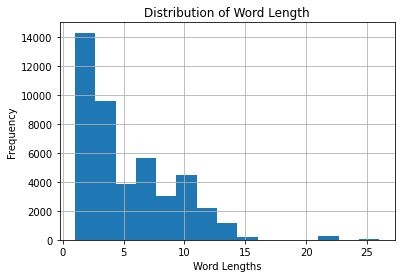

In [32]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [33]:
word_counts[:10]

[(1622, 'eletrobras'),
 (1580, 'a'),
 (1544, 'da'),
 (1398, 'rt'),
 (1141, 'o'),
 (1133, 'e'),
 (931, 'de'),
 (708, 'privatização'),
 (698, 'com'),
 (686, 'não')]

In [36]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')
stop_words.append('a')
stop_words.append('e')
stop_words.append('o')
stop_words.append('de')
stop_words.append('com')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop,tokens_stop2
0,1637262277186297858,rt eletricitários fazem ato no ministério ...,"[rt, eletricitários, fazem, ato, no, ministéri...",-0.296,Negativo,"[eletricitários, fazem, ato, ministério, minas...","[r, , , , , , l, r, i, c, i, á, r, i, s, ..."
1,1637262245917782019,rt eletrobras associação de empregados de...,"[rt, eletrobras, associação, de, empregados, d...",-0.296,Negativo,"[eletrobras, associação, empregados, deve, tom...","[r, , , , , , l, r, b, r, s, , , s, s, ..."
2,1637262233779486722,rt victorcostaluta a divulgação do balanço d...,"[rt, victorcostaluta, a, divulgação, do, balan...",0.000,Neutro,"[victorcostaluta, divulgação, balanço, eletrob...","[r, , , v, i, c, r, c, s, l, u, , , , d, ..."
3,1637262063033540609,rt requiaooficial não tem importância o diál...,"[rt, requiaooficial, não, tem, importância, o,...",0.000,Neutro,"[requiaooficial, importância, diálogo, pessoal...","[r, , , r, q, u, i, f, i, c, i, l, , , n, ..."
4,1637261988555542528,rt eletrobras associação de empregados de...,"[rt, eletrobras, associação, de, empregados, d...",-0.296,Negativo,"[eletrobras, associação, empregados, deve, tom...","[r, , , , , , l, r, b, r, s, , , s, s, ..."


In [37]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [38]:
word_list_stop[:10]

['eletricitários',
 'fazem',
 'ato',
 'ministério',
 'minas',
 'energia',
 'reestatização',
 'eletrobras',
 'lularees…',
 'eletrobras']

In [39]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop,tokens_stop2,tokens_pos
0,1637262277186297858,rt eletricitários fazem ato no ministério ...,"[rt, eletricitários, fazem, ato, no, ministéri...",-0.296,Negativo,"[eletricitários, fazem, ato, ministério, minas...","[r, , , , , , l, r, i, c, i, á, r, i, s, ...","[(eletricitários, NNS), (fazem, VBP), (ato, JJ..."
1,1637262245917782019,rt eletrobras associação de empregados de...,"[rt, eletrobras, associação, de, empregados, d...",-0.296,Negativo,"[eletrobras, associação, empregados, deve, tom...","[r, , , , , , l, r, b, r, s, , , s, s, ...","[(eletrobras, NNS), (associação, VBP), (empreg..."
2,1637262233779486722,rt victorcostaluta a divulgação do balanço d...,"[rt, victorcostaluta, a, divulgação, do, balan...",0.000,Neutro,"[victorcostaluta, divulgação, balanço, eletrob...","[r, , , v, i, c, r, c, s, l, u, , , , d, ...","[(victorcostaluta, NN), (divulgação, NN), (bal..."
3,1637262063033540609,rt requiaooficial não tem importância o diál...,"[rt, requiaooficial, não, tem, importância, o,...",0.000,Neutro,"[requiaooficial, importância, diálogo, pessoal...","[r, , , r, q, u, i, f, i, c, i, l, , , n, ...","[(requiaooficial, JJ), (importância, NN), (diá..."
4,1637261988555542528,rt eletrobras associação de empregados de...,"[rt, eletrobras, associação, de, empregados, d...",-0.296,Negativo,"[eletrobras, associação, empregados, deve, tom...","[r, , , , , , l, r, b, r, s, , , s, s, ...","[(eletrobras, NNS), (associação, VBP), (empreg..."


In [42]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(1622, 'eletrobras'),
 (708, 'privatização'),
 (664, 'povo'),
 (658, 'erikakokay'),
 (655, 'brasileiro'),
 (536, 'saiba'),
 (534, 'dica'),
 (528, 'denúncia'),
 (527, 'ganhou'),
 (526, '⚠️')]

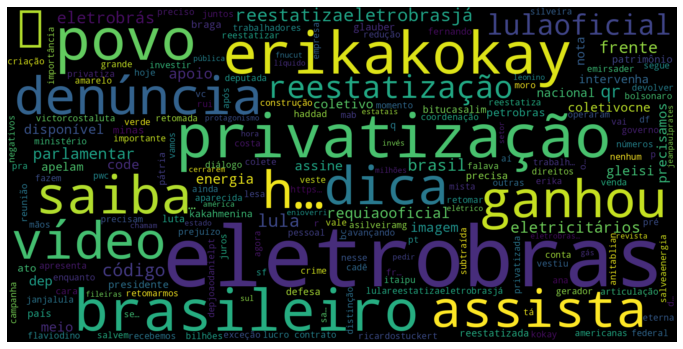

In [43]:
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
file_name = 'DF2.xlsx'
df2.to_excel(file_name)

In [44]:
comentarios = df2["text"].values
comentarios

array(['rt     eletricitários fazem ato no ministério de minas e energia pela reestatização da eletrobras\nhttps   t co  \n lularees…',
       'rt     eletrobras  associação de empregados deve tomar medidas legais para evitar perda de vaga no conselho\nhttps   t co sowtypnfip…',
       'rt  victorcostaluta  a divulgação do balanço da eletrobras chamou a atenção da sociedade   os resultados de    mostraram que a empresa t…',
       ...,
       'rt     recebemos do  coletivocne um colete dos eletricitários e uma distinção pelo nosso apoio à luta em defesa da eletrobras…',
       'rt     a eletrobras é patrimônio do povo brasileiro e precisa ser reestatizada já \n reestatizaeletrobrasjá \n coletivocne https…',
       'rt     a eletrobras é patrimônio do povo brasileiro e precisa ser reestatizada já \n reestatizaeletrobrasjá \n coletivocne https…'],
      dtype=object)

In [45]:
classes = df2["rotulos"].values
classes

array(['Negativo', 'Negativo', 'Neutro', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype=object)

In [46]:
vectorizer = CountVectorizer(analyzer = "word")
freq_comentarios = vectorizer.fit_transform(comentarios)
modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)



MultinomialNB()

In [ ]:
#teste_modelo = ['querido']
#freq_testes = vectorizer.transform(teste_modelo)
#modelo.predict(freq_testes)

In [47]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

array(['Negativo', 'Negativo', 'Neutro', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype='<U8')

In [48]:
metrics.accuracy_score(classes, resultados)

0.879

In [ ]:
##sentimentos = ["positivo","neutro","negativo"]

In [49]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       0.70      0.84      0.76       326
      Neutro       0.97      0.89      0.93      1650
    Positivo       0.15      0.62      0.24        24

    accuracy                           0.88      2000
   macro avg       0.61      0.79      0.65      2000
weighted avg       0.92      0.88      0.89      2000



In [50]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       274      36        16   326
Neutro         113    1469        68  1650
Positivo         7       2        15    24
All            394    1507        99  2000


In [51]:
#usando melhoria com Bigrams
vectorizer = CountVectorizer(ngram_range = (1, 3))
freq_comentarios = vectorizer.fit_transform(comentarios)

modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

MultinomialNB()

In [52]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

array(['Negativo', 'Negativo', 'Positivo', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype='<U8')

In [53]:
metrics.accuracy_score(classes, resultados)

0.787

In [54]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       0.66      0.83      0.73       326
      Neutro       0.99      0.78      0.87      1650
    Positivo       0.07      0.83      0.13        24

    accuracy                           0.79      2000
   macro avg       0.57      0.81      0.58      2000
weighted avg       0.93      0.79      0.84      2000



 Modelo Com Randow Forest

In [55]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [56]:
train_data_features = vectorizer.fit_transform(comentarios)
train_data_features

<2000x2856 sparse matrix of type '<class 'numpy.int64'>'
	with 23951 stored elements in Compressed Sparse Row format>

In [57]:
forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier()

In [58]:
class_sentimentos = df2["rotulos"].values
class_sentimentos

array(['Negativo', 'Negativo', 'Neutro', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype=object)

In [59]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier()

In [60]:
test_data_features_resultados = vectorizer.transform(comentarios)
test_data_features_resultados

<2000x2856 sparse matrix of type '<class 'numpy.int64'>'
	with 23951 stored elements in Compressed Sparse Row format>

In [61]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['Negativo', 'Negativo', 'Neutro', ..., 'Neutro', 'Neutro',
       'Neutro'], dtype=object)

In [62]:
metrics.accuracy_score(classes, resultados)

1.0

In [63]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00       326
      Neutro       1.00      1.00      1.00      1650
    Positivo       1.00      1.00      1.00        24

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [64]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       326       0         0   326
Neutro           0    1650         0  1650
Positivo         0       0        24    24
All            326    1650        24  2000
